In [43]:
from qiskit import QuantumCircuit,transpile
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.visualization import plot_histogram

In [44]:
simulator='ibmq_qasm_simulator'

In [45]:
p='101'
n=len(p)

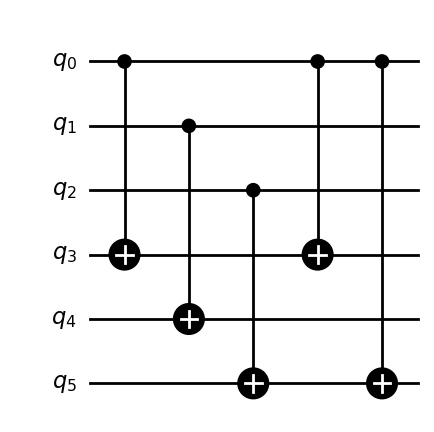

In [46]:
simon_oracle=QuantumCircuit(2*n,name='oracle')

simon_oracle.cx(range(0,n),range(n,2*n))
first_one_index=p[::-1].index('1')
ones_index=[i+n for i,v in enumerate(p) if v=='1']
simon_oracle.cx(first_one_index,ones_index)
simon_oracle.to_gate()

simon_oracle.draw(output='mpl',style='bw')

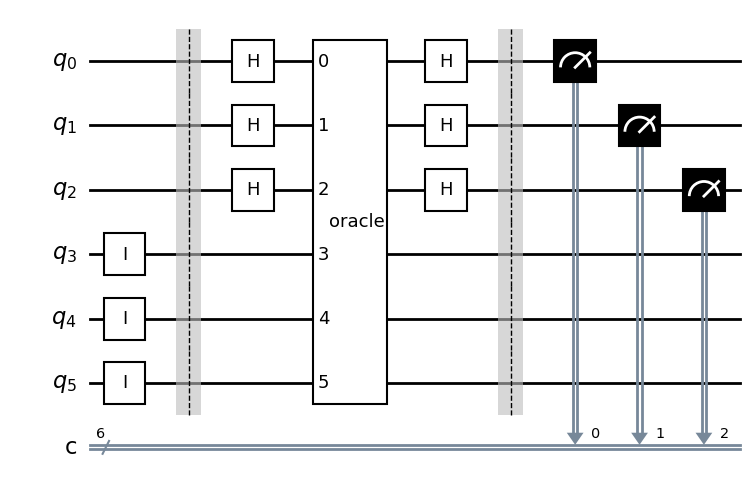

In [47]:
qc=QuantumCircuit(2*n,2*n)

qc.id(range(n,2*n))
qc.barrier()
#hadmard transform
qc.h(range(n))
#apply the oracle
qc.append(simon_oracle,range(2*n))
#hadmard transform
qc.h(range(n))
#measure
qc.barrier()
qc.measure(range(n),range(n))

qc.draw(output='mpl',style='bw')

In [48]:
def execute(qc,simulator):
    provider=QiskitRuntimeService()
    backend=provider.get_backend(simulator)
    job=backend.run(transpile(qc,backend),shots=1024)
    result=job.result()
    return result.get_counts()

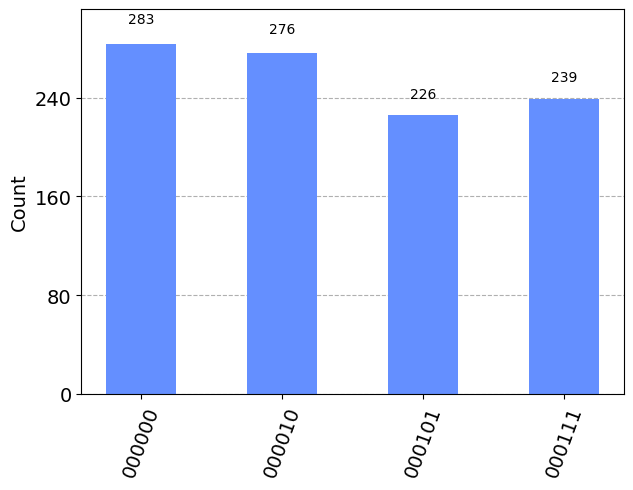

In [49]:
plot_histogram(execute(qc,simulator))